<a href="https://colab.research.google.com/github/MohammadErfanRashidi/Titanic-/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [215]:
# Uploading the dataset
dataset = pd.read_csv('/content/train.csv')

In [216]:
# Head
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [217]:
# Tail
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [218]:
# Shape
dataset.shape

(891, 12)

In [219]:
# Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [220]:
# Missing values
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [221]:
# Dropping the Cabin column
dataset.drop('Cabin', axis=1, inplace=True)

In [222]:
# Filling missing values in Age with the mean value
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

<ipython-input-222-55360c5aa8c4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)


In [223]:
# Missing values
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [224]:
# Values counts for Embarked
dataset['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [225]:
# Filling missing values in Embarked with the mode values
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

<ipython-input-225-6847cabfa600>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)


In [226]:
# Replacing Embarked with 0, 1, 2
dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Replacing Male and Femal with 0 and 1 in the dataset
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})

In [227]:
# Describe
dataset.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [228]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

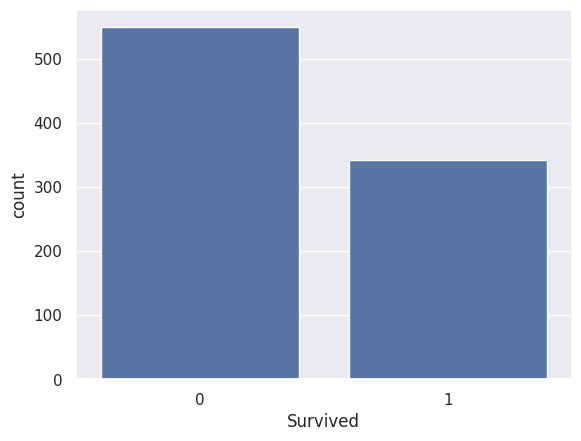

In [229]:
# Plotting Survived column
sns.countplot(x='Survived', data=dataset)

0: No

1: Yes

<Axes: xlabel='Sex', ylabel='count'>

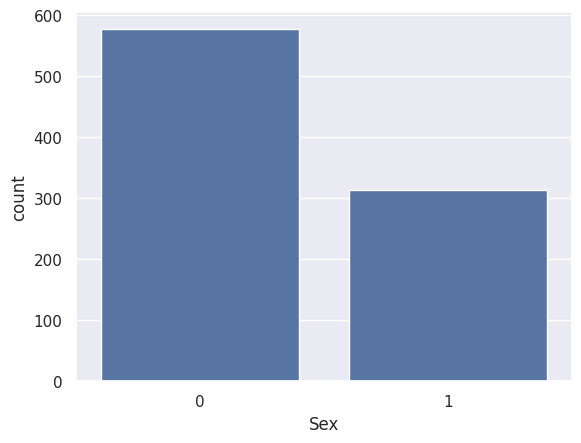

In [230]:
# Plotting Sex column
sns.countplot(x='Sex', data=dataset)

<Axes: xlabel='Sex', ylabel='count'>

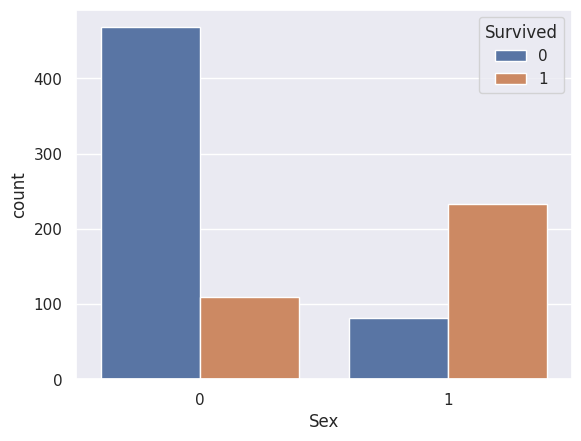

In [231]:
# Plotting Sex with Survived column
sns.countplot(x='Sex', hue='Survived', data=dataset)

<Axes: xlabel='Pclass', ylabel='count'>

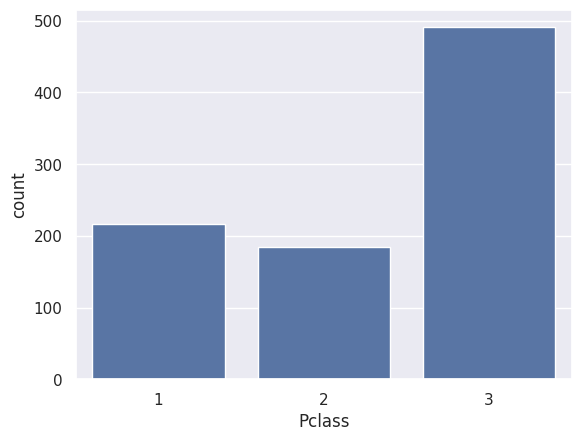

In [232]:
# Plotting Pclass
sns.countplot(x='Pclass', data=dataset)

<Axes: xlabel='Pclass', ylabel='count'>

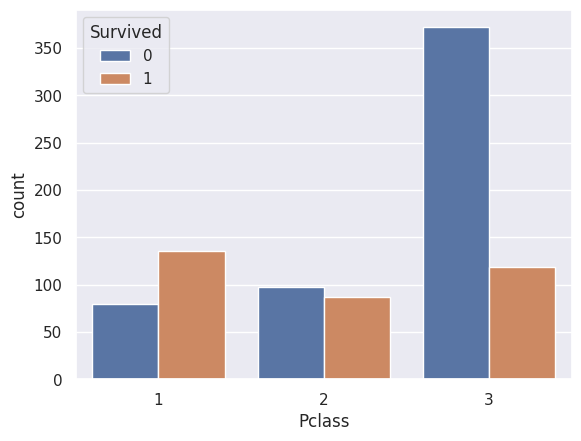

In [233]:
# Plotting Pclass and Survived
sns.countplot(x='Pclass', hue='Survived', data=dataset)

<ipython-input-234-c459d05a8ca9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'])


<Axes: xlabel='Age', ylabel='Density'>

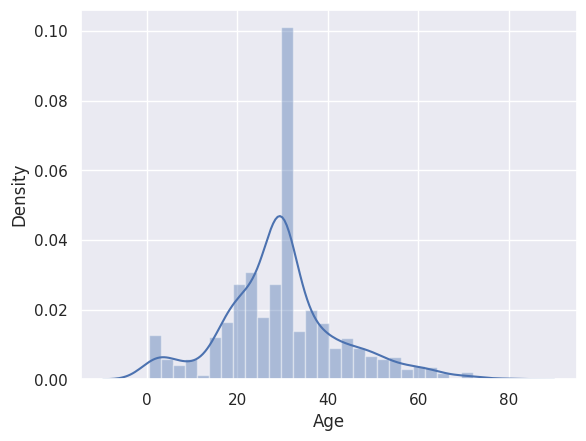

In [234]:
# Plotting Age column
sns.distplot(dataset['Age'])

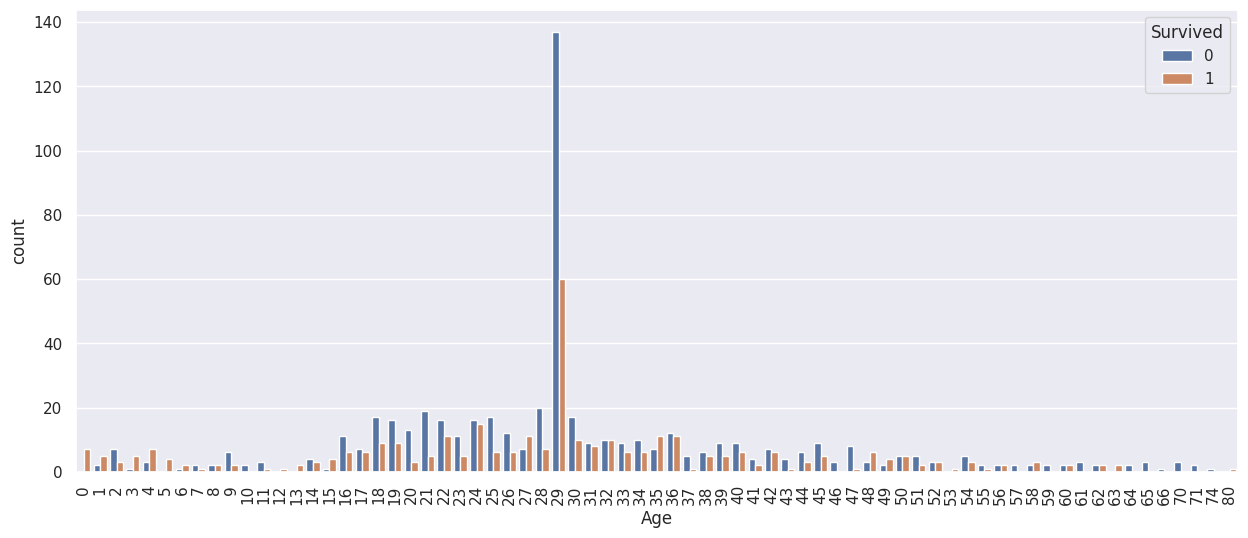

In [235]:
# Plotting Age and Survived column
plt.figure(figsize=(15, 6))

# Converting 'Age' to integers before plotting
dataset['Age'] = dataset['Age'].astype(int)

sns.countplot(x='Age', hue='Survived', data=dataset)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

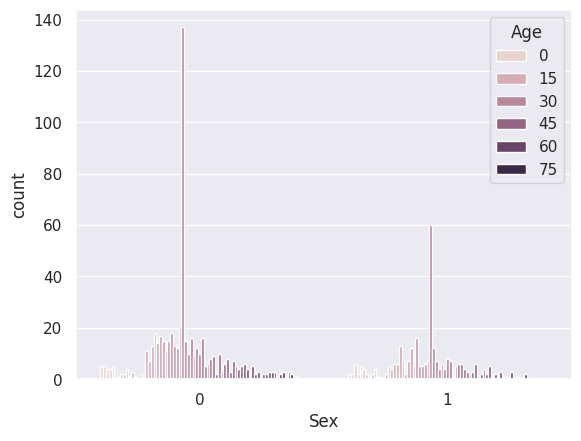

In [236]:
# Plotting Sex and Age
sns.countplot(x='Sex', hue='Age', data=dataset)

<Axes: >

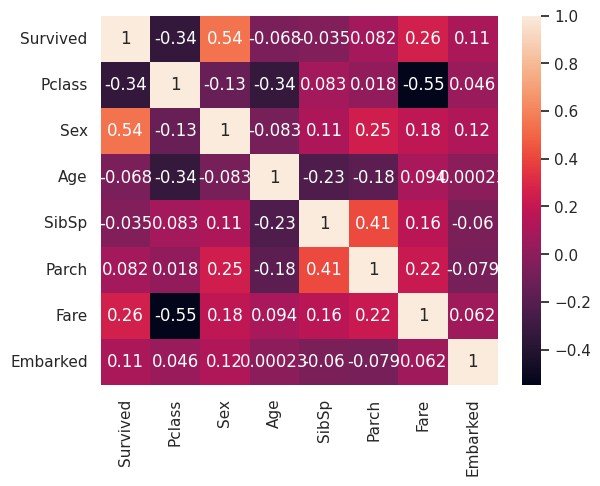

In [237]:
# Plotting the Heatmap

heatmap_dataset = dataset.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

sns.heatmap(heatmap_dataset.corr(), annot=True)

In [238]:
# Value counts of Survived
dataset['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [239]:
# Value counts of Sex
dataset['Sex'].value_counts()

,count
Sex,
0,577
1,314


In [240]:
# Value counts of Survived and Sex
dataset.groupby('Sex')['Survived'].value_counts()

Sex  Survived
0    0           468
     1           109
1    1           233
     0            81
Name: count, dtype: int64

In [241]:
# Head
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0


In [242]:
# Seperating X and Y (Excluding Name, PassengerId, Ticket)
X_train = dataset.drop(['Survived', 'Name', 'PassengerId', 'Ticket'], axis=1)
Y_train = dataset['Survived']

In [243]:
print(X_train)

     Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0         3    0   22      1      0   7.2500         0
1         1    1   38      1      0  71.2833         1
2         3    1   26      0      0   7.9250         0
3         1    1   35      1      0  53.1000         0
4         3    0   35      0      0   8.0500         0
..      ...  ...  ...    ...    ...      ...       ...
886       2    0   27      0      0  13.0000         0
887       1    1   19      0      0  30.0000         0
888       3    1   29      1      2  23.4500         0
889       1    0   26      0      0  30.0000         1
890       3    0   32      0      0   7.7500         2

[891 rows x 7 columns]


In [244]:
print(Y_train)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [245]:
# LogisticRegression
model = LogisticRegression()

In [246]:
# Fitting the model
model.fit(X_train, Y_train)

LogisticRegression()

In [247]:
# Evaluating the model
model.score(X_train, Y_train)

0.8024691358024691

In [248]:
# Uploading the test data
test_dataset = pd.read_csv('/content/test.csv')

In [249]:
# Creating a copy of test_dataset
test_dataset_copy = test_dataset.copy()

In [250]:
# Info
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [251]:
# Missing values
test_dataset.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [252]:
# Dropping Cabin column
test_dataset.drop('Cabin', axis=1, inplace=True)

In [253]:
# Filling missing values in Age with mean
test_dataset['Age'].fillna(test_dataset['Age'].mean(), inplace=True)

<ipython-input-253-c07e9abafcba>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_dataset['Age'].fillna(test_dataset['Age'].mean(), inplace=True)


In [254]:
# Replacing the missing value in Fare with mean
test_dataset['Fare'].fillna(test_dataset['Fare'].mean(), inplace=True)

<ipython-input-254-fd904a9d6ec5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_dataset['Fare'].fillna(test_dataset['Fare'].mean(), inplace=True)


In [255]:
# Missing values
test_dataset.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [256]:
# Replacing Embarked with 0, 1, 2
test_dataset['Embarked'] = test_dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Replacing Male and Femal with 0 and 1 in the dataset
test_dataset['Sex'] = test_dataset['Sex'].map({'male': 0, 'female': 1})

In [257]:
# Head
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [258]:
# X_test
X_test = test_dataset.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

In [259]:
print(X_test)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [260]:
# Predicting Y_test
Y_test = model.predict(X_test)

In [261]:
print(Y_test)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [262]:
# Adding the values of Y_test to the copy of test_dataset in Survived column
test_dataset_copy['Survived'] = Y_test

In [263]:
# Head
test_dataset_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


<Axes: xlabel='Survived', ylabel='count'>

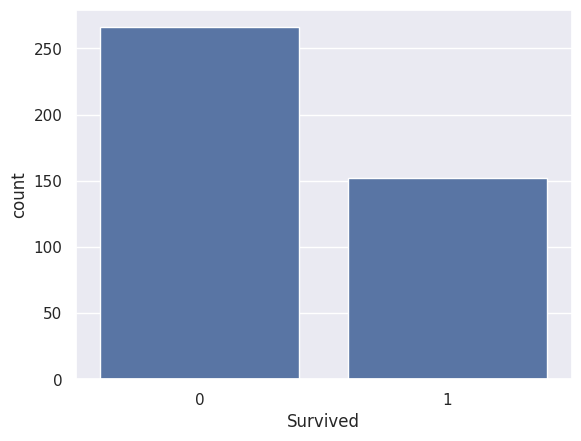

In [264]:
# Plotting Survived column
sns.countplot(x='Survived', data=test_dataset_copy)

<Axes: xlabel='Survived', ylabel='count'>

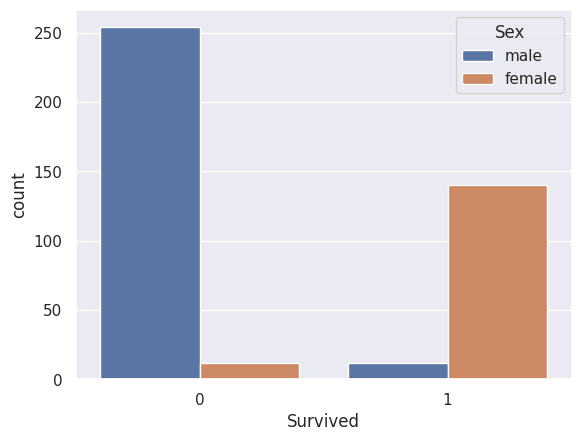

In [265]:
# Plotting Survived and Sex
sns.countplot(x='Survived', hue='Sex', data=test_dataset_copy)

<Axes: xlabel='Pclass', ylabel='count'>

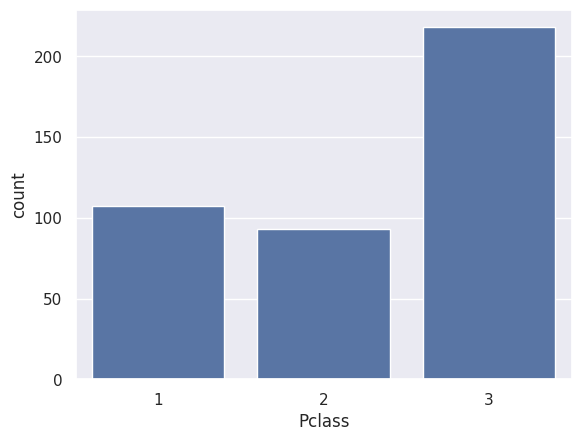

In [266]:
# Plotting Pclass
sns.countplot(x='Pclass', data=test_dataset_copy)

<Axes: xlabel='Pclass', ylabel='count'>

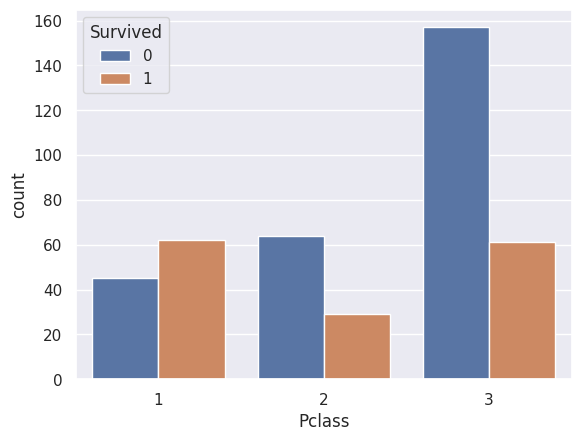

In [267]:
# Plotting Pclass and Survived
sns.countplot(x='Pclass', hue='Survived', data=test_dataset_copy)

In [268]:
# Exporting test_dataset_copy as a csv file named result
test_dataset_copy.to_csv('result.csv', index=False)